# Лабораторная работа 8. Обход бинарного дерева поиска. Поиск максимального и минимального значений

Четверикова Вера Борисовна, 21.05.2025

## Задание 8.1. Центрированный обход бинарного дерева поиска

<span style="color:red;">Доопределите или переопределите</span> классы `BinaryTree`, `BinaryNode`,
`EmptyNode` из Лабораторной работы 7 за счет определения нового метода
`lcr(self)`, реализующего центрированный обход бинарного дерева поиска.
Рекомендации по выполнению представлены в лекции к теме Бинарное дерево
поиска. Реализация на основе ООП.

In [1]:
class EmptyNode:
    """Пустой узел"""
    def __repr__(self):
        return '*'
    
    def insert(self, value):
        """Вставляет значение в дерево и возвращает новый узел"""
        return BinaryNode(EmptyNode(), value, EmptyNode())
    
    def __len__(self):
        """Пустой узел имеет длину 0"""
        return 0

    def lcr(self):
        """Центрированный обход для пустого узла"""
        return []

class BinaryNode:
    """Узел бинарного дерева поиска"""
    def __init__(self, left, value, right):
        self.left = left    
        self.value = value  
        self.right = right  
        
    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'
    
    def insert(self, value):
        """Вставляет значение в правильное место в дереве"""
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __len__(self):
        """Количество узлов: текущий узел + левое поддерево + правое поддерево"""
        return 1 + len(self.left) + len(self.right)

    def lcr(self):
        """Центрированный обход"""
        result = []
        result.extend(self.left.lcr())
        result.append(self.value)
        result.extend(self.right.lcr())
        return result

class BinaryTree:
    """Бинарное дерево поиска"""
    def __init__(self):
        self.root = EmptyNode()
        
    def __repr__(self):
        return repr(self.root)
    
    def insert(self, value):
        """Вставляет значение в дерево"""
        self.root = self.root.insert(value)
    
    def __len__(self):
        """Общее количество узлов в дереве"""
        return len(self.root)

    def lcr(self):
        """Центрированный обход дерева"""
        return self.root.lcr()

<span style="color:red;">Создайте</span> список `source_data` из 10<sup>3</sup> случайных чисел, равномерно
распределенных на отрезке [0,100]. <span style="color:red;">Постройте</span> бинарное дерево поиска по
списку случайных чисел и <span style="color:red;">выполните</span> центрированный обход дерева с
помощью метода `lcr`.

In [2]:
import matplotlib.pyplot as plt
import random as rnd

In [3]:
source_data = [rnd.uniform(0,100) for i in range(10**3)]

In [4]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [5]:
sorted_data = tree.lcr()

<span style="color:red;">Изобразите</span> график по точкам, ординаты которых заданы списком
`source_data`. В этой же графической области <span style="color:red;">изобразите</span> график по точкам,
одинаты которых заданы списком, результатом центрированного обхода
бинарного дерева поиска.

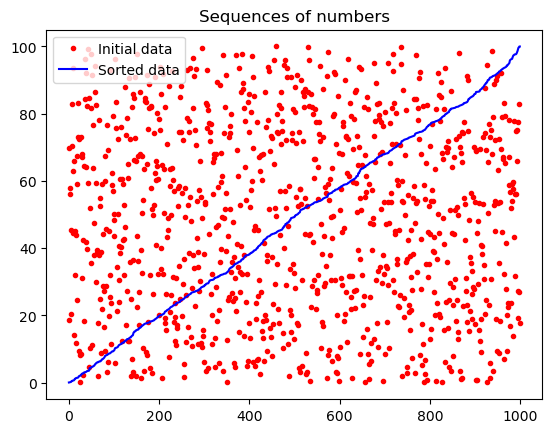

In [6]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 8.2. Нахождение минимального и максимального значения

<span style="color:red;">Доопределите или переопределите</span> классы `BinaryTree`, `BinaryNode`,
`EmptyNode` за счет определения методов `min(self)` и `max(self)` для
нахождения минимального и максимального значений в дереве, соответственно

In [ ]:
class EmptyNode:
    """Пустой узел"""
    def __repr__(self):
        return '*'
    
    def insert(self, value):
        """Вставляет значение в дерево и возвращает новый узел"""
        return BinaryNode(EmptyNode(), value, EmptyNode())
    
    def __len__(self):
        """Пустой узел имеет длину 0"""
        return 0

    def lcr(self):
        """Центрированный обход для пустого узла"""
        return []

    def min(self):
        """Минимальное значение в пустом дереве не определено"""
        raise ValueError("Минимальное значение не определено для пустого дерева")

    def max(self):
        """Максимальное значение в пустом дереве не определено"""
        raise ValueError("Максимальное значение не определено для пустого дерева")

class BinaryNode:
    """Узел бинарного дерева поиска"""
    def __init__(self, left, value, right):
        self.left = left    
        self.value = value  
        self.right = right  
        
    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'
    
    def insert(self, value):
        """Вставляет значение в правильное место в дереве"""
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __len__(self):
        """Количество узлов: текущий узел + левое поддерево + правое поддерево"""
        return 1 + len(self.left) + len(self.right)

    def lcr(self):
        """Центрированный обход"""
        result = []
        result.extend(self.left.lcr())
        result.append(self.value)
        result.extend(self.right.lcr())
        return result

    def min(self):
        """Находит минимальное значение в поддереве"""
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min()

    def max(self):
        """Находит максимальное значение в поддереве"""
        if isinstance(self.right, EmptyNode):
            return self.value
        else:
            return self.right.max()

class BinaryTree:
    """Бинарное дерево поиска"""
    def __init__(self):
        self.root = EmptyNode()
        
    def __repr__(self):
        return repr(self.root)
    
    def insert(self, value):
        """Вставляет значение в дерево"""
        self.root = self.root.insert(value)
    
    def __len__(self):
        """Общее количество узлов в дереве"""
        return len(self.root)

    def lcr(self):
        """Центрированный обход дерева"""
        return self.root.lcr()

    def min(self):
        """Находит минимальное значение в дереве"""
        if isinstance(self.root, EmptyNode):
            raise ValueError("Минимальное значение не определено для пустого дерева")
        return self.root.min()

    def max(self):
        """Находит максимальное значение в дереве"""
        if isinstance(self.root, EmptyNode):
            raise ValueError("Максимальное значение не определено для пустого дерева")
        return self.root.max()

<span style="color:red;">Протестируйте</span> корректность выполнения методов `min` и `max` для дерева `tree`,
созданного в Задании 8.1.

In [11]:
tree = BinaryTree()

values_to_insert = [50, 30, 3, 70, 20, 40, -5, 60, 80]
for value in values_to_insert:
    tree.insert(value)

print("Дерево:", tree)

try:
    min_value = tree.min()
    max_value = tree.max()
    print("Минимальное значение:", min_value)
    print("Максимальное значение:", max_value)
except ValueError as e:
    print(e)

Дерево: ((((*, -5, *), 3, (*, 20, *)), 30, (*, 40, *)), 50, ((*, 60, *), 70, (*, 80, *)))
Минимальное значение: -5
Максимальное значение: 80


In [12]:
empty_tree = BinaryTree()

try:
    empty_min = empty_tree.min()
except ValueError as e:
    print("Исключение для пустого дерева (min):", e)

try:
    empty_max = empty_tree.max()
except ValueError as e:
    print("Исключение для пустого дерева (max):", e)

Исключение для пустого дерева (min): Минимальное значение не определено для пустого дерева
Исключение для пустого дерева (max): Максимальное значение не определено для пустого дерева


## Задание 8.3. Создание модуля

<span style="color:red;">Напишите</span> модуль `binaryTree.py` на основе созданных классов.

<span style="color:red;">Напишите</span> строки документации для классов `BinaryTree`, `BinaryNode`,
`EmptyNode` и для каждого метода классов.

<span style="color:red;">Протестируйте</span> работу созданного модуля на примерах.

In [13]:
from binaryTree import BinaryTree

def test_binary_tree():
    tree = BinaryTree()
    print("Создано пустое дерево:", tree)

    values_to_insert = [50, 30, 70, 20, 40, 60, 80]
    print(f"Вставляем значения: {values_to_insert}")

    for value in values_to_insert:
        tree.insert(value)

    print("Дерево после вставки:", tree)

    sorted_values = tree.lcr()
    print("Центрированный обход:", sorted_values)
    assert sorted_values == sorted(values_to_insert), "Центрированный обход не соответствует отсортированным значениям"

    try:
        min_value = tree.min()
        max_value = tree.max()
        print("Минимальное значение:", min_value)
        print("Максимальное значение:", max_value)
        assert min_value == min(values_to_insert), "Минимальное значение неверно"
        assert max_value == max(values_to_insert), "Максимальное значение неверно"
    except ValueError as e:
        print("Ошибка:", e)

    empty_tree = BinaryTree()
    print("Пустое дерево:", empty_tree)
    
    try:
        empty_min = empty_tree.min()
    except ValueError as e:
        print("Исключение для пустого дерева (min):", e)

    try:
        empty_max = empty_tree.max()
    except ValueError as e:
        print("Исключение для пустого дерева (max):", e)

if __name__ == "__main__":
    test_binary_tree()

Создано пустое дерево: *
Вставляем значения: [50, 30, 70, 20, 40, 60, 80]
Дерево после вставки: (((*, 20, *), 30, (*, 40, *)), 50, ((*, 60, *), 70, (*, 80, *)))
Центрированный обход: [20, 30, 40, 50, 60, 70, 80]
Минимальное значение: 20
Максимальное значение: 80
Пустое дерево: *
Исключение для пустого дерева (min): Минимальное значение не определено для пустого дерева
Исключение для пустого дерева (max): Максимальное значение не определено для пустого дерева


## Задание 8.4. Примеры пользовательских классов

<span style="color:red;">Определите</span> три пользовательских класса с использованием возможностей ООП,
представленных в лекции к теме "Проектирование классов", например, классовые,
статические, абстрактные методы, атрибуты-свойства, шаблон синглтон и др.

Класс 1: `Date` с использованием классовых и статических методов

In [14]:
from datetime import date

class Date:
    """
    Класс, представляющий дату.

    Атрибуты:
        day (int): День.
        month (int): Месяц.
        year (int): Год.
    """

    def __init__(self, day, month, year):
        """
        Инициализирует объект Date.

        Аргументы:
            day (int): День.
            month (int): Месяц.
            year (int): Год.
        """

        self.day = day
        self.month = month
        self.year = year

    @classmethod
    def now(cls):
        """
        Создает объект Date с текущей датой.

        Возвращает:
            Date: Объект с текущей датой.
        """

        today = date.today()
        return cls(today.day, today.month, today.year)

    @staticmethod
    def is_leap_year(year):
        """
        Определяет, является ли год високосным.

        Аргументы:
            year (int): Год.

        Возвращает:
            bool: True, если год високосный, иначе False.
        """
        return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

    def __repr__(self):
        """
        Возвращает строковое представление объекта Date.

        Возвращает:
            str: Строковое представление.
        """

        return f"{self.day}.{self.month}.{self.year}"

Класс 2: `Person` с использованием атрибутов-свойств

In [15]:
class Person:
    """
    Класс, представляющий человека.

    Атрибуты:
        name (str): Имя человека.
        age (int): Возраст человека.
    """

    def __init__(self, name, age):
        """
        Инициализирует объект Person.

        Аргументы:
            name (str): Имя человека.
            age (int): Возраст человека.
        """

        self._name = name
        self._age = age

    @property
    def name(self):
        """
        Возвращает имя человека.

        Возвращает:
            str: Имя человека.
        """

        return self._name

    @name.setter
    def name(self, value):
        """
        Устанавливает имя человека.

        Аргументы:
            value (str): Новое имя.

        Raises:
            TypeError: Если значение не является строкой.
        """

        if isinstance(value, str):
            self._name = value
        else:
            raise TypeError("Имя должно быть строкой.")

    @property
    def age(self):
        """
        Возвращает возраст человека.

        Возвращает:
            int: Возраст человека.
        """

        return self._age

    @age.setter
    def age(self, value):
        """
        Устанавливает возраст человека.

        Аргументы:
            value (int): Новый возраст.

        Raises:
            ValueError: Если значение не является неотрицательным целым числом.
        """

        if isinstance(value, int) and value >= 0:
            self._age = value
        else:
            raise ValueError("Возраст должен быть неотрицательным целым числом.")

    def __repr__(self):
        """
        Возвращает строковое представление объекта Person.

        Возвращает:
            str: Строковое представление.
        """

        return f"Person(name='{self._name}', age={self._age})"

Класс 3: `Singleton` с использованием шаблона Singleton

In [16]:
class Singleton:
    """
    Класс, реализующий шаблон Singleton.

    Атрибуты:
        _instance (Singleton): Единственный экземпляр класса.
        value: Значение, хранящееся в экземпляре.
    """

    _instance = None

    def __new__(cls, *args, **kwargs):
        """
        Создает новый экземпляр класса, если он еще не существует.

        Аргументы:
            *args: Позиционные аргументы.
            **kwargs: Именованные аргументы.

        Возвращает:
            Singleton: Единственный экземпляр класса.
        """

        if cls._instance is None:
            cls._instance = super(Singleton, cls).__new__(cls)
        return cls._instance

    def __init__(self, value):
        """
        Инициализирует объект Singleton.

        Аргументы:
            value: Значение для инициализации.
        """

        self.value = value

    def __repr__(self):
        """
        Возвращает строковое представление объекта Singleton.

        Возвращает:
            str: Строковое представление.
        """
        
        return f"Singleton(value={self.value})"

<span style="color:red;">Продемонстрируйте</span> на примерах работу трех пользовательских классов.

Пример 1: Класс `Date`

In [17]:
specific_date = Date(15, 5, 2025)
print("Определенная дата:", specific_date)

current_date = Date.now()
print("Текущая дата:", current_date)

year = 2024
print(f"{year} год високосный:", Date.is_leap_year(year))

year = 2025
print(f"{year} год високосный:", Date.is_leap_year(year))

Определенная дата: 15.5.2025
Текущая дата: 21.5.2025
2024 год високосный: True
2025 год високосный: False


Пример 2: Класс `Person`

In [18]:
person = Person("Алексей", 30)
print(person)

person.name = "Александр"
person.age = 31
print(person)

try:
    person.name = 123
except TypeError as e:
    print("Ошибка:", e)

try:
    person.age = -5
except ValueError as e:
    print("Ошибка:", e)

Person(name='Алексей', age=30)
Person(name='Александр', age=31)
Ошибка: Имя должно быть строкой.
Ошибка: Возраст должен быть неотрицательным целым числом.


Пример 3: Класс `Singleton`

In [19]:
singleton1 = Singleton(10)
print(singleton1)

singleton2 = Singleton(20)
print(singleton2)

print("singleton1 is singleton2:", singleton1 is singleton2)

print("Значение singleton1:", singleton1.value)
print("Значение singleton2:", singleton2.value)

Singleton(value=10)
Singleton(value=20)
singleton1 is singleton2: True
Значение singleton1: 20
Значение singleton2: 20
